----

In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu) with your answers on or before **_11:59pm on Friday April 9th_**.

**BIG HINT:** Read the entire homework before starting.  

# Homework 5: Modeling Data as polynomial Functions

In this homework, we will look at fitting some data to a polynomial function.   

<img src="" width = 75%>

image from :

### Outline for Homework 1

1. [Polynomial Review](#Polynomials)
1. [Exact fit](#Exact_Fit)
2. [Piecewise Continuous Functions](#Piecewise_Continuous_Functions)
3. [Least Squares Fit](#Least_Squares_Fit)

---
<a name="Polynomials"></a>
# 1. Polynomial Review
Hopefully everyone is familiar with polynomials as we use them quite a bit in this course.  Here is a quick review.  I highly recommend searching for a video or tutorial if these definitions do not make sense:

A polynomial is a function that has:
- Constants Real numbers such as 6, −9, or 0.3
- Variables such as x and y 
- Exponents on the variables such as 2 in $y^2$, but only positive integers (ex. 0, 1, 2, 3, ...) are allowed

Because of the strict definition, polynomials have special properties that are easy to work with. For example we know that:
- If you add polynomials you get a polynomial
- If you multiply polynomials you get a polynomial
- Polynomials have smooth and continuous lines.

A common subset of polynomial we will use in this assignment can be written as follows:

$$y = C_0 + C_1x_1 + C_2x^2 + C_3x^3 \dots C_nx^n$$

Polynomials are often described by their "Order" which is the largest exponent with a non-zero constant in the polynomial.  The following are first, second and third order polynomials respectively:

$$y = C_0 + C_1x $$

$$y = C_0 + C_1x+ C_2x^2$$

$$y = C_0 + C_1x+ C_2x^2 + C_3x^3 $$


**_NOTE_**:  Anything with a polynomial variable above order 1 is non-linear. However, that doesn't mean we can use linear algebra to work with polynomials. 

---
<a name="Exact_Fit"></a>
# 2. Exact Fit

Consider a really simple example of data with two points (1,3) and (4,6).  Hopefully you can see that there is exactly one first order polynomial (line: $y = C_0 + C_1x_1$) to the data but there are infinite numbers of second order polynomials (Parabolas: $y = C_0 + C_1x_1+ C_2x_2^2$).  Often in science the best model is the simplest one that fits the data.  For example:


In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)


data = np.array([[1,3], [4,6]])

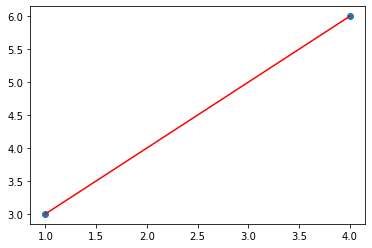

In [3]:
plt.scatter(data[:,0], data[:,1]);
plt.plot(data[:,0], data[:,1], c='red');

Notice plugging our knowns (a.k.a. $x$ and $y$ values) into the first order equation $y = C_0+C_1x$ results in the following two equations with two unknowns ($C_0$ and $C_1$):

$$3 = C_0 + C_1$$
$$6 = C_0 + C_14$$

The augmented form of these equations are as follows:


$$
\left[
\begin{matrix}
    1 & 1  \\
    1 & 4 
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
3 \\ 6 
\end{matrix}
\right]
$$

The standard $Ax=b$ matrix is also equivalent:


$$
\left[
\begin{matrix}
    1 & 1  \\
    1 & 4 
 \end{matrix}
\right] 
\left[
\begin{matrix}
C_0 \\ C_1 
\end{matrix}
\right] 
=
\left[
\begin{matrix}
3 \\ 6
\end{matrix}
\right]$$



Solving the above equations for $C_0$ and $C_1$ we can see that $C_0 = 2$ and $C_1 = 1$ (i.e. the intercept and slop of the line though the two points.

Okay, now let's get a little more complex. Consider the following three points (1,3), (4,6), and (-2,8).  

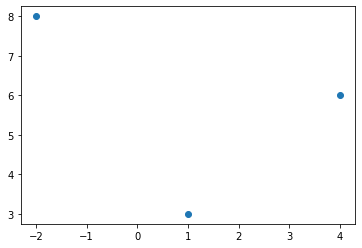

In [4]:
data = np.array([[1,3], [4,6], [-2,8]])
plt.scatter(data[:,0], data[:,1]);

Clearly there is no first order polynomial that will fit perfectly though these points. However, there exists exactly one second order polynomial that should fit. 

**<font color=red>Question 1:</font>**  (10 points) Assume that points (1,3), (4,6), and (-2,8) line on the polynomial 
$y = C_0 + C_1x+ C_2x^2$. Generate a system of linear equations as an augmented matrix $A$. 

In [11]:
##Construct your augmented matrix A here.

A = np.matrix([[1,1,1,3],[1,4,16,6],[1,-2,4,8]])


A

matrix([[ 1,  1,  1,  3],
        [ 1,  4, 16,  6],
        [ 1, -2,  4,  8]])

⎛⎡1  0  0  34/9 ⎤           ⎞
⎜⎢              ⎥           ⎟
⎜⎢0  1  0  -11/9⎥, (0, 1, 2)⎟
⎜⎢              ⎥           ⎟
⎝⎣0  0  1   4/9 ⎦           ⎠

In [15]:
from answercheck import checkanswer
checkanswer.detailedwarnings=False
checkanswer.eq_matrix(A,"cab10f7e352aeb42699cfc0c2f5d9b82");

Testing Answer
Answer seems to be correct



**<font color=red>Question 2:</font>**   (5 points) Solve for $C_O, C_1$ and $C_2$ using $A$.

In [23]:
# Put your answer to the above question here.
# import sympy - pulled from internet 
from sympy import * 
  
M = Matrix(A)
   
# Use sympy.rref() method 
M_rref, j = M.rref()
M_rref

C0 = M_rref[0,3]
C1 = M_rref[1,3]
C2 = M_rref[2,3]

In [24]:
from answercheck import checkanswer
checkanswer.detailedwarnings=False
checkanswer.matrix([C0, C1, C2],"2b87a1002755b58f481f39d5dcc0f206");

Testing Answer
Answer seems to be correct



**<font color=red>Question 3:</font>** (5 points) Plot the resulting polynomial from question 3 in the range $x=[-3,5]$ and include the original points which should appear on the polynomial. 

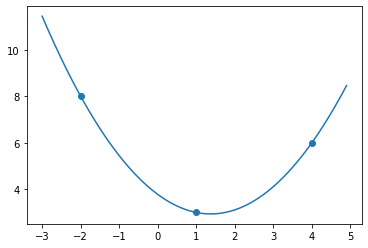

In [32]:
# YOUR CODE HERE
x = np.arange(-3,5,.1)
Fx = C0 + C1*x + (C2*(x**2))

plt.plot(x, Fx);
plt.scatter(data[:,0], data[:,1]);

The following program is intended to take four points as inputs ($p1, p2, p3, p4 \in R^2$) and calculates the coefficients $C_0, C_1,C_2$ and $C_3$ so that the graph of $f(x) = C_0 + C_1x + C_2x^2 + C_3x^3$ passes smoothly through the points. 

In [84]:
def fitPoly3(p1,p2,p3,p4):
    
    A = np.matrix([[1, p1[0], p1[0]**2, p1[0]**3],
                   [1, p2[0], p2[0]**2, p2[0]**3],
                   [1, p3[0], p3[0]**2, p3[0]**3],
                   [1, p4[0], p4[0]**2, p4[0]**3]])
    print(A)
    b = np.matrix([p1[1],p2[1],p3[1],p4[1]]).T

    print(b)
    C = np.linalg.solve(A, b)
    C0 = C[0,0]
    C1 = C[1,0]
    C2 = C[2,0]
    C3 = C[3,0]

    #Try putting your figure generation code here
    x = np.arange(-3,5,.1)
    Fx = C0 + C1*x + (C2*(x**2))
    plt.plot(x, Fx);
    plt.scatter(data[:,0], data[:,1]);
    
    return (C0,C1,C2,C3)

 **<font color=red> Question 4:</font>** (5 points) Test the above function with the following points (1,2), (-1,6), (2,3), (3,2) as inputs and print the values for $C_0, C_1,C_2$ and $C_3$.

In [87]:
p1 = sym.Matrix([[1],[2]])
p2 = sym.Matrix([[-1],[6]])
p3 = sym.Matrix([[2],[3]])
p4 = sym.Matrix([[3],[2]])

In [88]:
# YOUR CODE HERE
fitPoly3(p1,p2,p3,p4)

[[1 1 1 1]
 [1 -1 1 -1]
 [1 2 4 8]
 [1 3 9 27]]
[[2]
 [6]
 [3]
 [2]]


TypeError: No loop matching the specified signature and casting was found for ufunc solve

In [82]:
C0b = 2
C1b = 6
C2b = 3 
C3b = 2

 **<font color=red>Question 5:</font>** (5 points) Plot the resulting polynomial from question 4 in the range $x=[-2,4]$ and include the original points which should appear on the polynomial. 

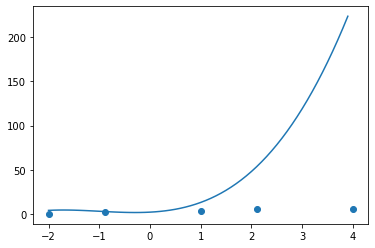

In [83]:
# YOUR CODE HERE
x = np.arange(-2,4,.1)
Fx = C0b + C1b*x + (C2b*(x**2)) + (C3b*(x**3))

plt.plot(x, Fx);
plt.scatter(data[:,0], data[:,1]);

As you get more points the method above starts to fall apart.  Consider the following set of points.  

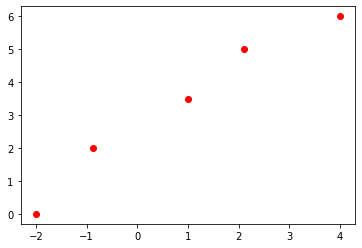

In [80]:
data = np.array([[-2, 0], [-0.88,2], [1,3.5], [2.1, 5], [4,6]])
plt.scatter(data[:,0], data[:,1], c='red');

In order to use the exact fit method we would need to fit a 4th order polynomial which would result in something like the following:

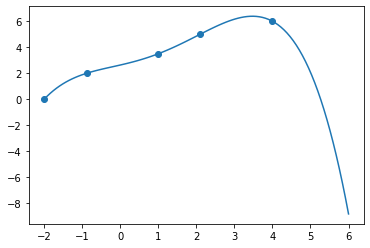

In [81]:
x1 = np.linspace(-2, 6, 100)
y1 = -0.0371*x1**4+0.1347*x1**3 + 0.0969*x1**2 + 0.6736*x1 + 2.6319

plt.scatter(data[:,0], data[:,1]);
plt.plot(x1,y1)


**<font color=red>Question 6</font>** (5 points) In your own words, explain why this type of "exact fit" answer may not provide a function that accurately models the provided data?

many different polynomial functions can data points, models based on only a few points are usually inaccurate

----
<a name="Piecewise_Continuous_Functions"></a>

# 4. Piecewise Continuous Functions

One method that can be used to better fit the data is a piecewise continuous function (aka spline fitting).  The idea here is to fit  polynomial curves between the points in the data such that each polynomial "Flows" into the next polynomial. For example, consider the following set of points:

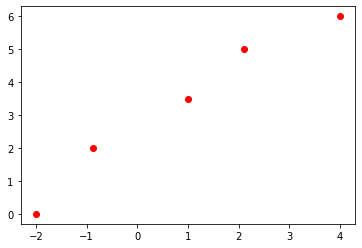

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

data = np.array([[-2, 0], [-0.88,2], [1,3.5], [2.1, 5], [4,6]])
x = data[:,0]
y = data[:,1]

plt.scatter(x, y, c='red');

With piecewise function we would fit one function between the first two points, a second function between the second and third point, etc.  The total number of curves would be $n-1$ where $n$ is the number of points.  In the example above with 5 points this would be 4 polynomial equations. If we choose to use third order polynomials each equation will have 4 unknowns. This means we have a total of 16 unknowns for which we need to solve.

To set up these system of equations for third order polynomials we first need to assume that for each curve the two end points ($i$ and $i+1$)) are on the curve. For example, for the first curve between points zero and one would have the following two equations:

$$C_0+C_1x_0+C_2x_0^2+C_3x_0^3=y$$
$$C_0+C_1x_1+C_2x_1^2+C_3x_1^3=y$$

Similarly, for the curve between points 1 and 2 we have a second polynomial with a new set of constants ($C_4, C_5, C_6$ and $C_7$) and we would have the following two equations

$$C_4+C_5x_1+C_6x_1^2+C_7x_1^3=y$$
$$C_4+C_5x_2+C_6x_2^2+C_7x_2^3=y$$

Using this approch we can only formulate $(n-1)$ equations which would typically lead to an underdetermined system of equations. In order to create more equations in our unknowns, we can also assume that neighboring curves will have the same slope (first derivative) and curvature (second derivative) at the shared point. These constraints help us have each polynomial "flow" into the next. For example the equating the slope and curvature between the first and second polynomials would result in the following equations:

$$C_1+2C_2x_1+3C_3x_1^2=C_5+2C_6x_1+3C_7x_1^2$$
$$2C_2+6C_3x_1=2C_6+6C_7x_1$$


Using the above we should be able to construct 14 equations for the five provided points; 8 equations to ensure each point is on the curves, 3 equations for equating the slopes of neighboring curves and 3 equations for equating the curvatures for neighboring curves.  In total this means we have 16 unknowns and 14 equations.  Lucky for us there are a few easy assumptions we can make to add two additional equations and constrain the system enough to solve for a unique solution of the polynomial constants.  

To make things easy lets just set the second derivative (curvature) at each end point of the data to zero. In other words:


$$2C_2+6C_3x_1=0$$
$$2C_{18}+6C_{19}x_4=0$$

For more information about this approach please and alternative choices for constraints see the following:
- [Description](http://www.dam.brown.edu/people/alcyew/handouts/splines.pdf)
- [Slides](http://berlin.csie.ntnu.edu.tw/Courses/Numerical%20Methods/Lectures2012S/NM2012S-Lecture18-Splines%20and%20Piecewise%20Interpolation.pdf)


**<font color=red>Question 7</font>** (25 points) Write program that can generate a $16 \times 16$ matrix $A$ and a $16 \times 1$ matrix $b$ to solve for four third order polynomials given the above data.  Each row in the matrix should correspond to one of the equations above.  There are lots of correct ways to do this (and lots of things you can do to make a mistake). As a starting point here is some code you can use to use as a scaffold:

In [3]:
n = data.shape[0]
order = 3

n_coeffs = (order+1)*(n-1)
A = np.zeros((n_coeffs, n_coeffs))
b = np.zeros(n_coeffs)

row = 0
#Add first point to first equation.
A[row,0:(order+1)] = [1, x[0], x[0]**2, x[0]**3];
b[row] = y[0]
row += 1;

#Add Last point to last equation.
A[row,-(order+1):] = [1, x[-1], x[-1]**2, x[-1]**3];
b[row] = y[-1]
row += 1

# Loop though the middle points
for i in range(1,n-1):
    #Add internal point to left equation
    A[row, (i-1)*(order+1):i*(order+1)] = [1, x[i], x[i]**2, x[i]**3];
    b[row] = y[i]
    row +=1
    
    #Add internal point to right equation
    A[row, i*(order+1):(i+1)*(order+1)] = [1, x[i], x[i]**2, x[i]**3];
    b[row] = y[i]
    row += 1
    
    # n-1 rows that ensure the Slope of internal point match both left and right equations.  
    A[row, (i-1)*(order+1):(i+1)*(order+1)] = [0, 1, 2*x[i], 3*x[i]**2, 0, -1, -2*x[i], -3*x[i]**2];
    b[row] = 0
    row += 1

## Build out the rest of the A matrix here. Make sure you include
    
# n-1 rows that ensure the Curvature of internal point  match both left and right equations.


    
# Add the final two equations that make the curvature at the end points zero.

# 2𝐶2+6𝐶3𝑥1=0
# 2𝐶18+6𝐶19𝑥4=0

 

#
    
sym.Matrix(A)
A

array([[  1.      ,  -2.      ,   4.      ,  -8.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   1.      ,   4.      ,  16.      ,
         64.      ],
       [  1.      ,  -0.88    ,   0.7744  ,  -0.681472,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   1.      ,
         -0.88    ,   0.7744  ,  -0.681472,   0.      ,   0.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   1.      ,  -1.76    ,   2.3232  ,   0.      ,
         -1.      ,   1.76    , 

In [4]:
b

array([0. , 6. , 2. , 2. , 0. , 3.5, 3.5, 0. , 5. , 5. , 0. , 0. , 0. ,
       0. , 0. , 0. ])

**_NOTE_**:  There are many valid $16 \times 16$ matrices for $A$ which will produce the correct results.  The following answer check assumes that you built $A$ as described above.  By summing the columns it should not matter which order the rows are in.  If you find a different $A$ that is valid, you will be given full credit. 

In [ ]:
from answercheck import checkanswer
checkanswer.detailedwarnings=False
checkanswer.vector(np.sum(A,axis=0),"b7b77668a8f1913366278c37225d5dad",decimal_accuracy=3);

**<font color=red>Question 7</font>** (Point 10) Useing $A$ and $b$ from question 6, solve for all 16 polynomial coefficients.  Store them in a vector called C. 

In [7]:
# Put your answer to the above question here.
#C = np.linalg.solve(A,b)

In [19]:
from answercheck import checkanswer
checkanswer.detailedwarnings=False
checkanswer.vector(C,"f39d7508a29347d786386a07abd68f70",decimal_accuracy=3);

Testing Answer
Answer seems to be incorrect



AssertionError: Answer is incorrect 0099bab0641ff39720d4ff8be429afd0

Assuming everything is working above, the following code will plot all $n-1$ polynomials in the ranges between the points. You will know the answer is correct if there is a smooth transition between the polynomials.

In [ ]:
for i in range(n-1):
    c = C[i*(order+1):(i+1)*(order+1)]
    x1 = np.linspace(x[i], x[i+1], 100)
    y1 = np.poly1d(c[::-1])(x1)
    plt.plot(x1, y1)
    
plt.scatter(x, y)

----
<a name="Least_Squares_Fit"></a>

# 3. Least Squares Fit

When there is noise in the data (small errors) the above methods above start to fall apart even more. In this section we want to use the extra data to give us a simple.  Basically we want to use more data to average out the errors.  This process is known as least squares fit (LSF).   


As pictured below, <a href="https://en.wikipedia.org/wiki/Linear_least_squares">Least Squares</a> is a method by which we estimate a best-fit polynomial from a given data set by minimizing the error between the line and the oints. 

<img alt="Animated graph of 2D points showing a line fitting to the points and rotating showing the error difference" src="https://upload.wikimedia.org/wikipedia/en/e/ed/Least_Squares.gif" width="50%">


Considering the above figure, the goal is to find an equation for the line $c_0 + c_1x = y$ that "best fits" the points.

Putting this into our standard matrix format we want:

$$
\left[
\begin{matrix}
 1 & x 
 \end{matrix}
\right] 
\left[
\begin{matrix}
    c_0   \\
    c_1   
 \end{matrix}
\right] 
= [y]
$$

We can see that if we could pick any two points out of the above data and get an "exact fit" line similar to part 1 of this homework:
$$
\left[
\begin{matrix}
 1 & x_0  \\
 1 & x_1 
 \end{matrix}
\right] 
\left[
\begin{matrix}
    c_0   \\
    c_1  
 \end{matrix}
\right] =
\left[
\begin{matrix}
 y_0 \\
 y_1
 \end{matrix}
\right]  
$$

We could also try to do some really crazy Piecewise Continuous Functions but there are so many points it would look like spaghetti.

In order to fit the best fit the polynomial we want to build an **_overdetermined_** system with many more equations than unknowns.  Something like the following:


$$
\left[
\begin{matrix}
 1 & x_0  \\
 1 & x_1  \\
 1 & x_2 \\
 \vdots & \vdots\\
 1 & x_{m-1} 
 \end{matrix}
\right] 
\left[
\begin{matrix}
    c_0   \\
    c_1   
 \end{matrix}
\right] =
\left[
\begin{matrix}
 y_0 \\
 y_1 \\
 y_2 \\
 \vdots \\
 y_{m-1}
 \end{matrix}
\right] 
$$


Basically we want to solve for our coefficient $C_0$ and $C_1$ that minimize the "Least Squares Error" error between the points and the line estimation.  

However, we know that when there are more equation than unknowns there is no exact solution. Lets consider the following example:

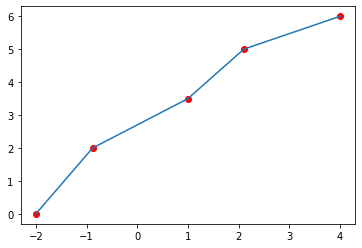

In [93]:
data = np.array([[-2, 0], [-0.88,2], [1,3.5], [2.1, 5], [4,6]])
plt.scatter(data[:,0], data[:,1], c='red');
plt.plot(data[:,0], data[:,1]);

Lets define our overdetermined system as follows:

In [94]:
A = np.zeros((len(data), 2)) 
b = np.zeros((len(data),1))

row = 0;
for i in data:
    A[row,:] = [1, i[0]]
    b[row] = i[1]
    row +=1
print(A)
print(b)

[[ 1.   -2.  ]
 [ 1.   -0.88]
 [ 1.    1.  ]
 [ 1.    2.1 ]
 [ 1.    4.  ]]
[[0. ]
 [2. ]
 [3.5]
 [5. ]
 [6. ]]


Notice if we try to solve for $C$ using ```numpy.linalg.solve``` we get an error which says we can only solve the forumla if matrix $A$ is "square" (i.e. the number of equations is the same as the number of unknowns). 

In [95]:
## Uncomment to see the error. Then recomment so you can run all.
#np.linalg.solve(A,b)

Turns out we can use a "trick" to make the $A$ matrix square (We will be explaining this trick in class).  All we need to do is left multiply $A$ by it's Transpose.  To make the equations work out, we also need to left multiply $b$ by it's transpose as well:

In [96]:
A.T@A

array([[ 5.    ,  4.22  ],
       [ 4.22  , 26.1844]])

In [98]:
b.T@b

array([[77.25]])

In [99]:
C = np.linalg.solve(A.T@A,A.T@b)
C

array([[2.46751761],
       [0.98635354]])

There exists a proof (again, we will go over this in class) that the solution to the above equation is the same as the LSF solution to our problem.  Lets plot the results:

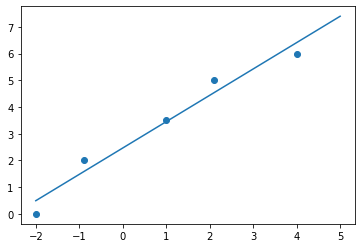

In [25]:
x1 = np.linspace(-2, 5, 100)
y1 = C[0]+C[1]*x1
plt.scatter(data[:,0], data[:,1]);
plt.plot(x1,y1)

----

Now lets use LSF to find a model for a much bigger set of data. Consider the following example from a [Penn State statistics course](https://online.stat.psu.edu/stat501/lesson/9/9.8):


In 1981, n = 78 bluegills (fish) were randomly sampled from Lake Mary in Minnesota. The researchers (Cook and Weisberg, 1999) measured and recorded the  data ([Bluegills dataset](https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/bluegills.txt))l where the first measurement is the age of the blugill (in years) and the second datapoint is the length of bluegill (fish).  Here is some code to download the data and plot it using python:

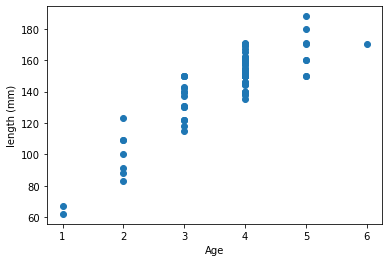

In [101]:
import pandas
URL = "https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/bluegills.txt"
data = pandas.read_csv(URL,sep='\t',header=(0))
data = data.values
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("length (mm)");


**<font color=red>Question 8</font>**  (10 points) Write program that can generate a $78 \times 3$ matrix $A$ and a $78 \times 1$ matrix $b$ which represents an overdetermined system that we will use to fit a second order polynomial to the data.  Each row in the matrix should correspond to one of the points in the data set and fit into the equation $y = C_0 + C_1x + C_2x^2$.

In [27]:
# YOUR CODE HERE
A = 

b = 

NotImplementedError: 

**<font color=red>Question 9</font>**  (10 points) Use the trick described at the beginning of this section to convert the $A$ and $b$ matrix into a "square" system and solve for the constants using the ```numpy.linalg.solve``` function:

In [100]:
#Put your answer to the above question here.
A_ = A.T@A
b_ = b.T@b

C = np.linalg.solve(A_,b_)

ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 1 is different from 2)

In [29]:
from answercheck import checkanswer
checkanswer.detailedwarnings=False
checkanswer.vector(C,"a0779880719fbfc968a8cd91aaf52848",decimal_accuracy=3);

Testing Answer
Answer seems to be incorrect



AssertionError: Answer is incorrect 0099bab0641ff39720d4ff8be429afd0

**<font color=red>Question 10</font>** (10 points)  Plot the polynomial model in the range of $x=[0,6]$ along side the original data. 

In [ ]:
## put your answer to the above question here.

In [ ]:
C0 = 
C1 = 
C2 = 

In [ ]:
x = np.arange(0,6,.1)
Fx = C0 + C1*x + (C2*(x**2))

plt.plot(x, Fx);
plt.scatter(x,y)

---------
### Congratulations, we're done!


Written by Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.